In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile as shp
import plotly.express as px

In [25]:

zipcodes_csv = pd.read_csv('output-data/schools_rated-per-zipcode.csv')
cleaned_zipcode_df = zipcodes_csv[['name','zip','type','level-codes','lat','lon','lat_lon','new rating']].copy()
cleaned_zipcode_df['zip'] = cleaned_zipcode_df['zip'].fillna(0).astype(int)
cleaned_zipcode_df.head()

,name,zip,type,level-codes,lat,lon,lat_lon,new rating
0,Graduation Achievement Center Charter High School,30303,charter,h,33.760502,-84.387169,"(33.760502, -84.387169)",NaN
1,Wellspring Living,30303,public,"m,h",33.754742,-84.385574,"(33.754742, -84.385574)",NaN
2,The Life School of Atlanta,30303,private,h,33.749504,-84.392090,"(33.749504, -84.39209)",B-
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",C+
4,The Keystone School,30334,private,"m,h",33.749733,-84.385696,"(33.749733, -84.385696)",A+


In [38]:
cleaned_zipcode_df['zip'].describe()


count      167.000000
mean     17954.455090
std      14925.149642
min          0.000000
25%          0.000000
50%      30303.000000
75%      30319.000000
max      30354.000000
Name: zip, dtype: float64

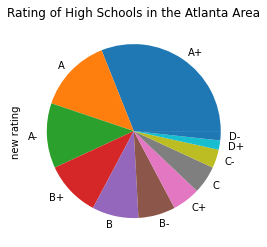

In [18]:
labels= ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']

cleaned_zipcode_df.sort_values('new rating', ascending=False)
cleaned_zipcode_df['new rating'].value_counts().plot(kind='pie',labels=labels)
plt.title("Rating of High Schools in the Atlanta Area")
plt.savefig("output-data/Ratings_of_schools.png")

plt.show()

In [40]:
df = cleaned_zipcode_df.dropna()
df.describe()

,zip,lat,lon
count,18.000000,18.000000,18.000000
mean,30313.888889,33.747633,-84.385233
std,8.407902,0.028079,0.033095
min,30303.000000,33.675117,-84.451271
25%,30308.250000,33.733166,-84.396873
50%,30314.000000,33.749733,-84.386391
75%,30315.000000,33.761865,-84.366835
max,30334.000000,33.790104,-84.313904


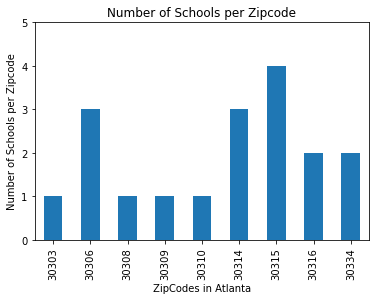

In [52]:


#calculate sum of values by group
df_zips = df.groupby(['zip'])['name'].count()

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.ylim([0, 5])

# displaying the title
plt.title("Number of Schools per Zipcode")
plt.savefig('output-data/num_schools.png')

In [72]:
rating_range = cleaned_zipcode_df.copy()
#data_time_range["zipcode"]=z["zipcode"].unique()
rating_range["A+"]=""
rating_range["A"]=""
rating_range["A-"]=""
rating_range["B+"]=""
rating_range["B"]=""
rating_range["B-"]=""
rating_range["C+"]=""
rating_range["C"]=""
rating_range["C-"]=""
rating_range["D+"]=""
rating_range["D"]=""
rating_range["D-"]=""
rating_range.head()

,name,zip,type,level-codes,lat,lon,lat_lon,new rating,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-
0,Graduation Achievement Center Charter High School,30303,charter,h,33.760502,-84.387169,"(33.760502, -84.387169)",NaN,,,,,,,,,,,,
1,Wellspring Living,30303,public,"m,h",33.754742,-84.385574,"(33.754742, -84.385574)",NaN,,,,,,,,,,,,
2,The Life School of Atlanta,30303,private,h,33.749504,-84.392090,"(33.749504, -84.39209)",B-,,,,,,,,,,,,
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",C+,,,,,,,,,,,,
4,The Keystone School,30334,private,"m,h",33.749733,-84.385696,"(33.749733, -84.385696)",A+,,,,,,,,,,,,


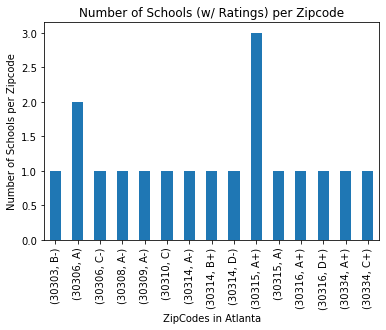

In [71]:
#calculate sum of values by group
df_zips = df.groupby(['zip'])['new rating'].value_counts()

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.xlim  
# displaying the title
plt.title("Number of Schools (w/ Ratings) per Zipcode")
plt.savefig('output-data/ratings.png')

In [57]:
!pip install folium

     |████████████████████████████████| 102 kB 2.4 MB/s ta 0:00:011


In [58]:
import folium
map = folium.Map(location=[33.675117, -84.451271], default_zoom_start=15)
map

In [62]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map) # create marker clusters
for i in range((df_zips.shape[0])):
    location = [df_zips['lat'][i], df_zips['lon'][i]]
    tooltip = "Zipcode: {}".format(df_zips["zip"][i])
    folium.Marker(location, 
                  popup="""
                  <i>Mean sales price: </i> <br> <b>${}</b> 
                  """.format(round(df_zips['name'][i],2)),
                  tooltip=tooltip).add_to(marker_cluster)
map

KeyError: 'lat'